<a href="https://colab.research.google.com/github/Niki025/WineQualityPrediction/blob/main/WineQualityPrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

red = pd.read_csv('../content/winequality-red.csv',sep=';')
white = pd.read_csv('../content/winequality-white.csv',sep=';')

In [5]:
df = red.append(red, ignore_index=True)
df.head()

<ipython-input-5-7a127f873d8d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = red.append(red, ignore_index=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
data = white.append(white, ignore_index=True)
data.head()

<ipython-input-6-47b3a47ef971>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = white.append(white, ignore_index=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
wine = red.append(white, ignore_index=True)
wine.head(4000)


<ipython-input-7-89bc91dbf1f3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine = red.append(white, ignore_index=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8.4,0.30,0.25,17.75,0.047,25.0,218.0,1.00016,2.98,0.66,9.1,5,white
3996,6.5,0.19,0.27,4.90,0.037,13.0,101.0,0.99160,3.17,0.41,11.8,6,white
3997,8.0,0.36,0.39,1.60,0.024,26.0,93.0,0.99116,3.15,0.49,11.9,6,white
3998,6.1,0.16,0.24,1.40,0.046,17.0,77.0,0.99319,3.66,0.57,10.3,6,white


In [8]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


<ipython-input-8-7f22a91ae70a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['quality'].drop('quality')


<ipython-input-9-88edb43bf50b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


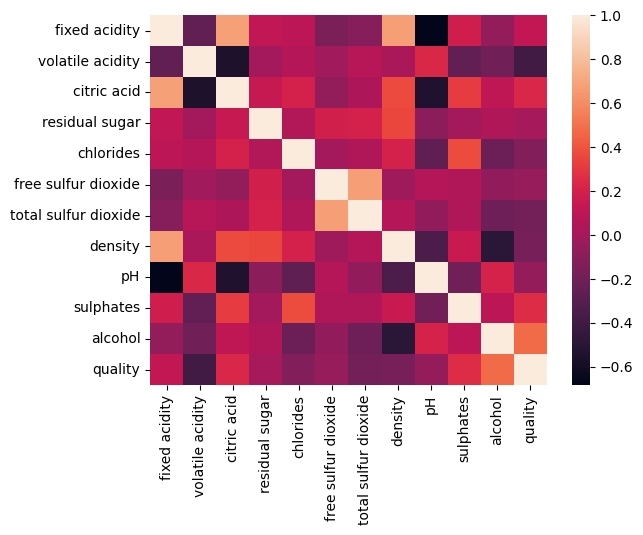

In [9]:
sns.heatmap(df.corr())
plt.show()

<ipython-input-10-72c094189ca4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='ocean')


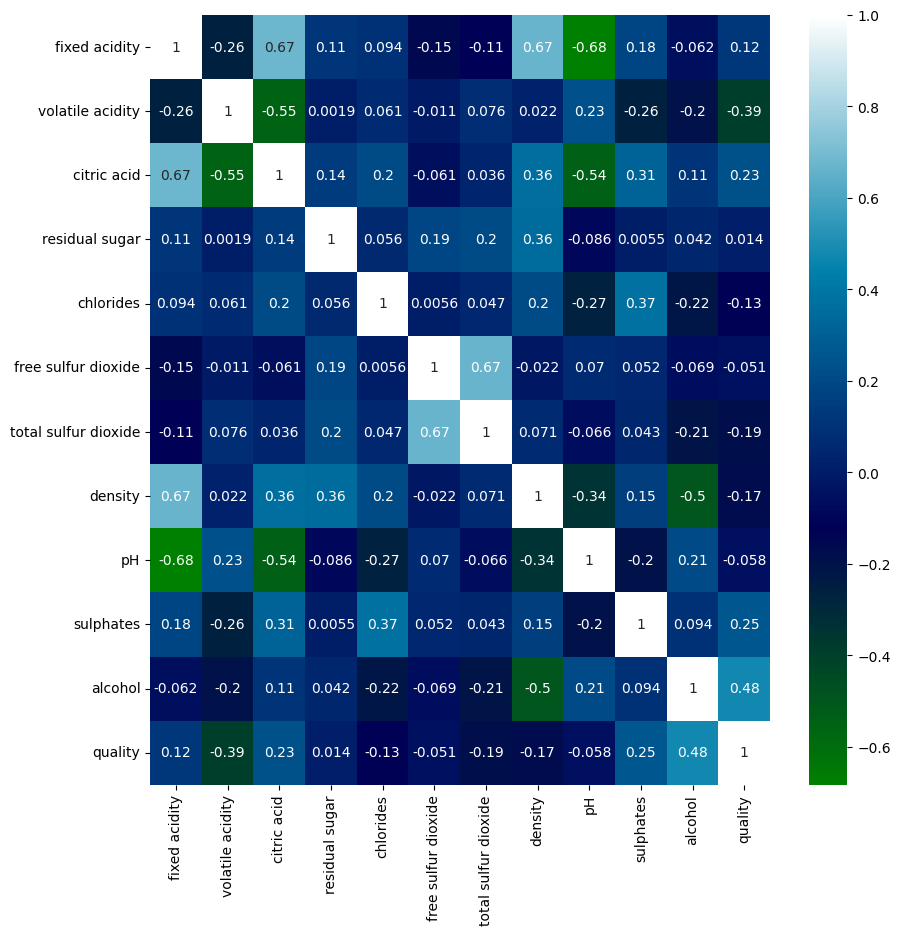

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap='ocean')
plt.show()

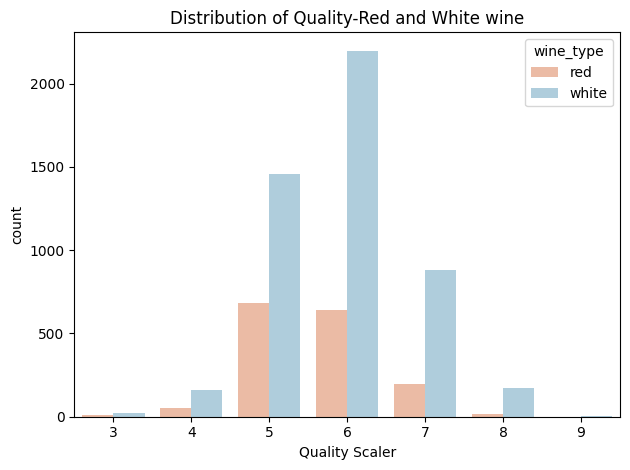

In [11]:
sns.countplot(x='quality',hue='wine_type',data=wine,palette='RdBu')
plt.title('Distribution of Quality-Red and White wine')
plt.xlabel('Quality Scaler')
plt.tight_layout()

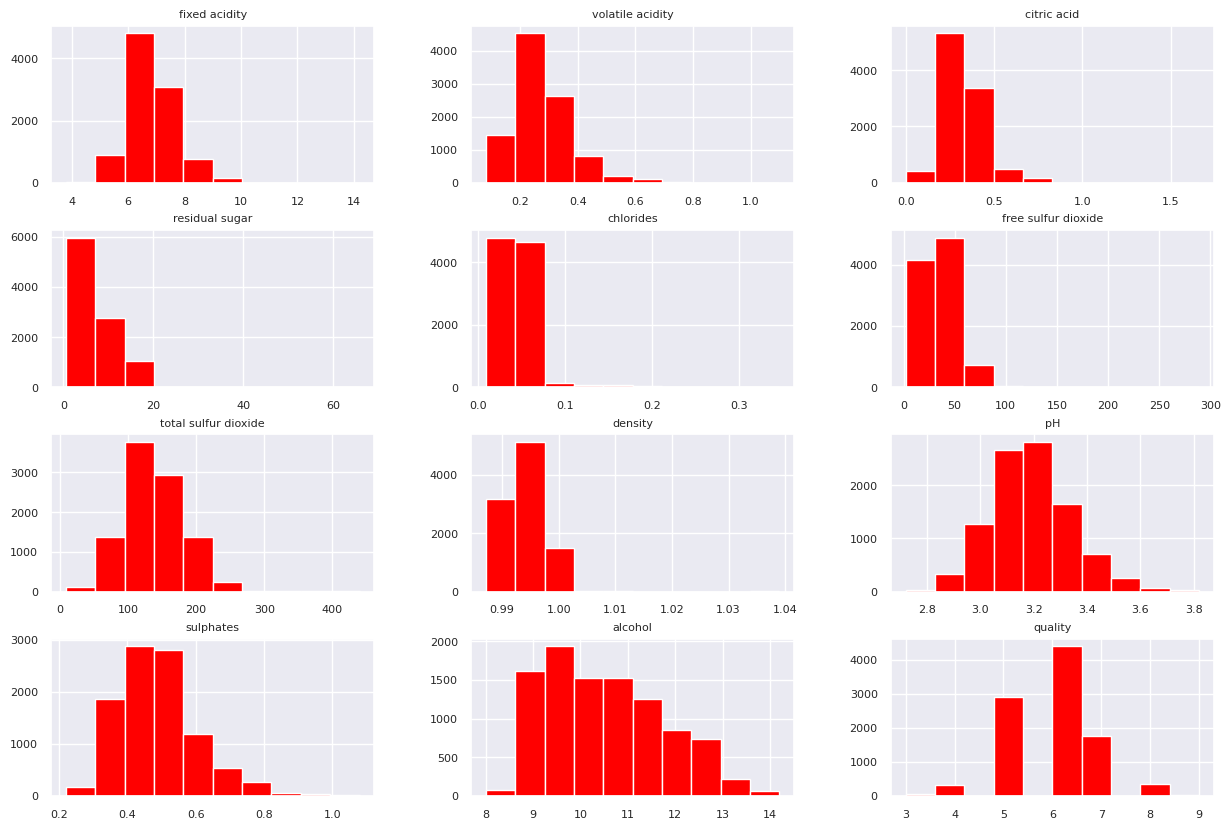

In [12]:
dataFrame = pd.DataFrame(data)
sns.set()
fig = data.hist(figsize=(15,10), color='red', xlabelsize=8, ylabelsize=8)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()

In [ ]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs
    return high_correlations

features = get_features(0.05)
print(features)
x = features
y = df['quality']